In [44]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [45]:
dh = pd.read_csv(r"F:\dektop241205\health_app\brestcancer2\Breast_cancer_data.csv")


In [46]:
dh.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [47]:
dh.shape

(569, 6)

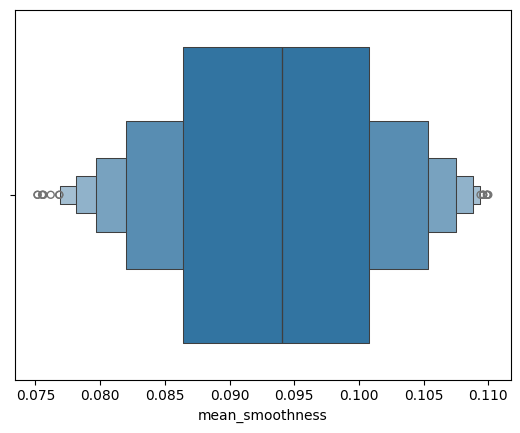

In [48]:

dh = dh[dh["mean_smoothness"] <= 0.11]
dh = dh[dh["mean_smoothness"] >= 0.075]
sn.boxenplot(x ="mean_smoothness",data=dh)
plt.show()

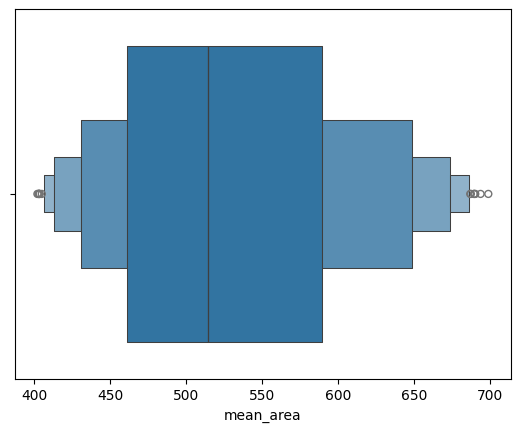

In [49]:
dh = dh[dh["mean_area"] <= 700]
dh = dh[dh["mean_area"] >= 400]
sn.boxenplot(x ="mean_area",data=dh)
plt.show()

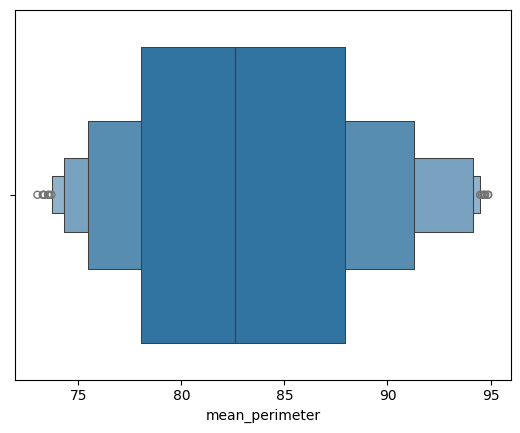

In [50]:
dh = dh[dh["mean_perimeter"] <= 95]
dh = dh[dh["mean_perimeter"] >= 70]

sn.boxenplot(x ="mean_perimeter",data=dh)
plt.show()

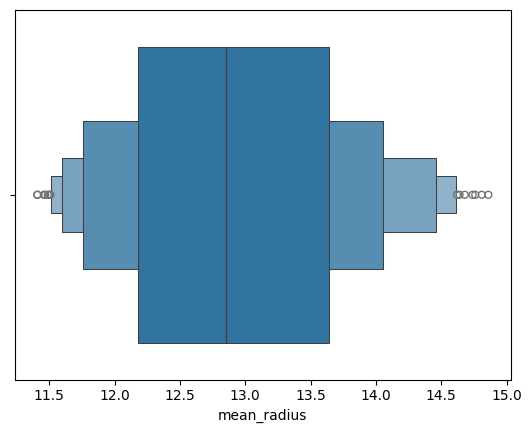

In [51]:
sn.boxenplot(x ="mean_radius",data=dh)
plt.show()

In [52]:
dh = dh[dh["mean_radius"] <= 18]
dh = dh[dh["mean_radius"] >= 10]

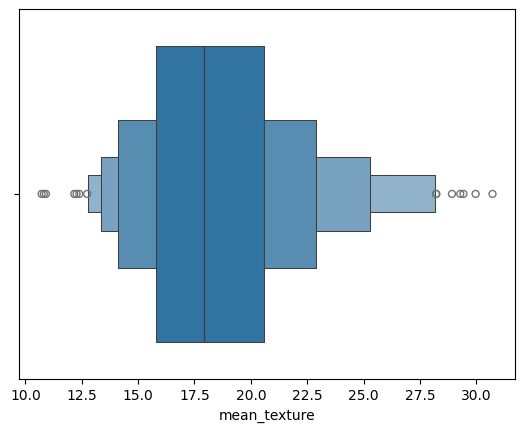

In [53]:
sn.boxenplot(x ="mean_texture",data=dh)
plt.show()

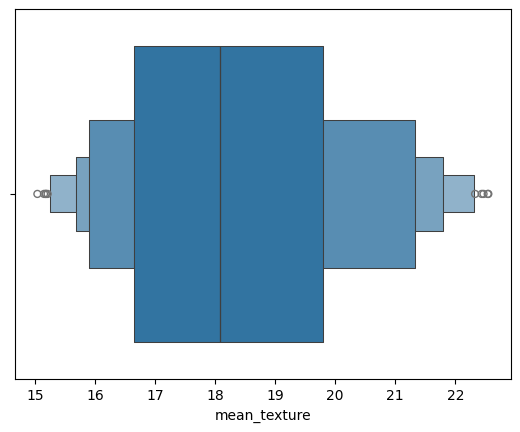

In [54]:
dh = dh[dh["mean_texture"] <= 23]
dh = dh[dh["mean_texture"] >=15 ]
sn.boxenplot(x ="mean_texture",data=dh)
plt.show()

In [56]:
dh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 16 to 544
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      140 non-null    float64
 1   mean_texture     140 non-null    float64
 2   mean_perimeter   140 non-null    float64
 3   mean_area        140 non-null    float64
 4   mean_smoothness  140 non-null    float64
 5   diagnosis        140 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 7.7 KB


In [57]:
x = dh.drop(columns="diagnosis",axis=1)

y=dh["diagnosis"]


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [59]:
scalar = StandardScaler()

In [61]:
x = scalar.fit_transform(x)

In [62]:
# from sklearn.model_selection import train_test_split
# from sklearn import svm
# from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LogisticRegression
# randomstate = 0
# best_score = 0
# for randomstate in range(1, 1001):
#     x_train, x_test, y_train, y_test = train_test_split(
#         x, y, test_size=0.2, random_state=randomstate, stratify=y
#     )
#     clasifirer = LogisticRegression()
#     clasifirer.fit(x_train, y_train)
#     accuracyScoe_x_test = clasifirer.predict(x_test)
#     score = accuracy_score(accuracyScoe_x_test, y_test)
#     if score > best_score:
#         best_score = score
#         best_randomstate = randomstate
# print(f"best random state:{best_randomstate}")
# print(f"best score:{best_score * 100}")

best random state:29
best score:100.0


In [63]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2, random_state=29, stratify=y
    )
clasifirer = LogisticRegression()
clasifirer.fit(x_train, y_train)

LogisticRegression()

In [65]:
import pickle
with open("Brestcancer2.sav","wb") as f:
    pickle.dump(clasifirer,f)